In [77]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import statsmodels.api as sm

In [78]:
from HMM_main import *

In [79]:
## 
# df_result = pd.read_csv('results/aggregate_results.csv')
df_result = pd.read_csv('results/aggregate_results_imputed.csv')
countries_info = pd.read_csv('data/dl1_countrycodeorg_country_name.csv')
ConsiderTC, ConsiderMB, discount, scenario = 1, 1, 0, 'val'

def get_df(df_result, ConsiderTC, ConsiderMB, discount, scenario):
    df = df_result[(df_result['discount']==discount)&
                   (df_result['ConsiderTC']==ConsiderTC)&
                   (df_result['ConsiderMB']==ConsiderMB)&
                   (df_result['scenario']==scenario)]
    df = df[df['tax'] > 0]
    return df

In [80]:
df_analysis = get_df(df_result, ConsiderTC, ConsiderMB, discount, scenario)
df_tax = df_analysis.groupby('Country Code').sum()
print (df_tax.describe())

         Unnamed: 0  ConsiderTC  ConsiderMB      GDPloss         tax  \
count  2.040000e+02  204.000000  204.000000   204.000000  204.000000   
mean   1.279657e+06   28.990196   28.990196   186.795565    0.005012   
std    8.568738e+05    0.098771    0.098771   872.124918    0.002618   
min    0.000000e+00   28.000000   28.000000     0.001657    0.001187   
25%    1.471750e+03   29.000000   29.000000     2.023379    0.003117   
50%    1.850098e+06   29.000000   29.000000    14.017870    0.004399   
75%    1.851570e+06   29.000000   29.000000    86.755630    0.006511   
max    1.853071e+06   29.000000   29.000000  9473.915798    0.017067   

             pc_loss  discount  
count     204.000000     204.0  
mean     5667.360579       0.0  
std      9916.679447       0.0  
min        52.456524       0.0  
25%       606.690604       0.0  
50%      2466.310309       0.0  
75%      7176.547546       0.0  
max    115654.007634       0.0  


## DALYs

In [81]:
## DALYs
DALYs = pd.read_csv('bigdata/Total cancers/DALYs (Disability-Adjusted Life Years).csv')

In [82]:
data = df_tax.merge(DALYs, on='Country Code')
income = countries_info[['Country Code', 'Income group']]
data = data.merge(income, on='Country Code')
x = data[['DALYs (Disability-Adjusted Life Years)']].apply(np.log10)
X = sm.add_constant(x)
# y = 100 * data[['tax']]
y = data[['tax']].apply(np.log10)
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print("Parameters: ", ols_results.params)
print("R2: ", ols_results.rsquared)

Parameters:  const                                    -5.185592
DALYs (Disability-Adjusted Life Years)    0.814407
dtype: float64
R2:  0.7593875213365445


/Users/caozhong/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


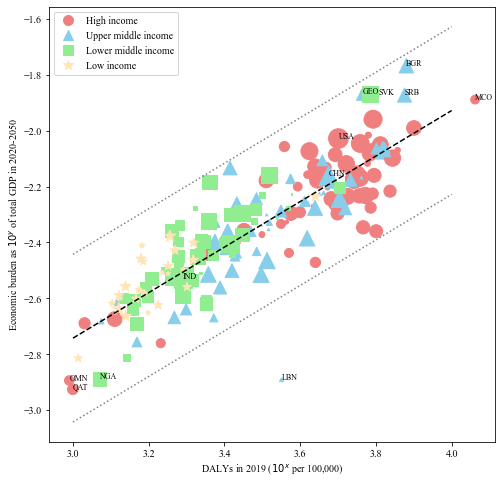

In [83]:

# plt.rcParams['font.family']='Courier New, monospace'
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(8,8))

colors = {'High income': 'lightcoral', 'Upper middle income' : 'skyblue', 'Lower middle income': 'lightgreen', 
       'Low income': 'moccasin'}
markers = {'High income': 'o', 'Upper middle income' : '^', 'Lower middle income': 's', 
       'Low income': '*'}
income_group = ['High income', 'Upper middle income', 'Lower middle income',  'Low income']

legends = []
for income in income_group:
    legend = mlines.Line2D([], [], color=colors[income], marker=markers[income], linestyle='None',
                          markersize=10, label=income)
    legends.append(legend)
plt.legend(handles=legends)
      

for income in income_group:
    area = data[data['Income group'] == income]
    x = area[['DALYs (Disability-Adjusted Life Years)']].apply(np.log10)
    y = area[['tax']].apply(np.log10)
    # y = 100 * area[['tax']]
    ax.scatter(x, y, c = colors[income], marker = markers[income], s = 30 * (area['GDPloss'] + 1).apply(np.log2))

# countries = ['CHN', 'USA', 'IND', 'MCO', 'BGR', 'SRB', 'HUN', 'BRN', 'DOM', 'LBN', 'PRT', 'GRC']
# countries = ['MCO', 'IRL', 'BMU', 'BDI', 'SOM', 'LBN', 'USA', 'CHN', 'IND']
# countries = data['Country Code']
countries = ['CHN', 'USA', 'IND', 'MCO', 'BGR', 'SRB', 'GEO', 'OMN', 'NGA', 'QAT', 'LBN']
for country in countries:
    i = data[data['Country Code'] == country].index.values[0]
    x_i, y_i = np.log10(data.loc[i, 'DALYs (Disability-Adjusted Life Years)']), np.log10(data.loc[i, 'tax'])
    ax.annotate(country, (x_i, y_i), size=8)
# i = data[data['Country Code'] == 'GEO'].index.values[0]    
# x_i, y_i = data.loc[i, 'DALYs (Disability-Adjusted Life Years)'] - 500, 100 * data.loc[i, 'tax']
# ax.annotate('GEO', (x_i, y_i), size=8)
# i = data[data['Country Code'] == 'UKR'].index.values[0]    
# x_i, y_i = data.loc[i, 'DALYs (Disability-Adjusted Life Years)'] + 200, 100 * data.loc[i, 'tax']
# ax.annotate('UKR', (x_i, y_i), size=8)
i = data[data['Country Code'] == 'SVK'].index.values[0]    
x_i, y_i = np.log10(data.loc[i, 'DALYs (Disability-Adjusted Life Years)']) + 0.03, np.log10(data.loc[i, 'tax']) 
ax.annotate('SVK', (x_i, y_i), size=8)

x1, x2 = 3.0, 4.0
plt.plot([x1, x2], [ols_results.params[0]+x1 * ols_results.params[1], ols_results.params[0]+x2 * ols_results.params[1]], linestyle='--', color='black')
plt.plot([x1, x2], [0.3 + ols_results.params[0]+x1 * ols_results.params[1], 0.3 + ols_results.params[0]+x2 * ols_results.params[1]], linestyle=':', color='grey')
plt.plot([x1, x2], [-0.3 + ols_results.params[0]+x1 * ols_results.params[1], -0.3 + ols_results.params[0]+x2 * ols_results.params[1]], linestyle=':', color='grey')

plt.ylabel('Economic burden as $10^y$ of total GDP in 2020-2050')
plt.xlabel('DALYs in 2019 ($10^x$ per 100,000)')
plt.savefig('tables/figure_5.pdf')

## Deaths

In [84]:
## motality
# mortality = pd.read_csv('bigdata/Total cancers/Deaths.csv')

In [85]:
# data = df_tax.merge(mortality, on='Country Code')
# income = countries_info[['Country Code', 'Income group']]
# data = data.merge(income, on='Country Code')
# x = data[['Deaths']]
# X = sm.add_constant(x)
# y = 100 * data[['tax']]
# ols_model = sm.OLS(y, X)
# ols_results = ols_model.fit()
# print("Parameters: ", ols_results.params)
# print("R2: ", ols_results.rsquared)

In [86]:

# plt.rcParams['font.family']='Courier New, monospace'
# fig, ax = plt.subplots(figsize=(8,8))
# #
# colors = {'High income': 'lightcoral', 'Upper middle income' : 'skyblue', 'Lower middle income': 'lightgreen', 
#        'Low income': 'moccasin'}
# markers = {'High income': 'o', 'Upper middle income' : '^', 'Lower middle income': 's', 
#        'Low income': '*'}
# income_group = ['High income', 'Upper middle income', 'Lower middle income',  'Low income']

# legends = []
# for income in income_group:
#     legend = mlines.Line2D([], [], color=colors[income], marker=markers[income], linestyle='None',
#                           markersize=10, label=income)
#     legends.append(legend)
# plt.legend(handles=legends)
      

# for income in income_group:
#     area = data[data['Income group'] == income]
#     x = area[['Deaths']]
#     y = 100 * area[['tax']]
#     ax.scatter(x, y, c = colors[income], marker = markers[income], s = 30 * (area['GDPloss'] + 1).apply(np.log2))

# countries = ['CHN', 'USA', 'IND', 'MCO', 'BGR', 'SRB', 'BRN', 'LBN', 'PRT', 'GRC', 'SVK', 'UKR']
# # countries = data['Country Code']
# for country in countries:
#     i = data[data['Country Code'] == country].index.values[0]
#     x_i, y_i = data.loc[i, 'Deaths'], 100 * data.loc[i, 'tax']
#     ax.annotate(country, (x_i, y_i), size=8)
# # i = data[data['Country Code'] == 'GEO'].index.values[0]    
# # x_i, y_i = data.loc[i, 'Deaths'] - 500, 100 * data.loc[i, 'tax']
# # ax.annotate('GEO', (x_i, y_i), size=8)
# # i = data[data['Country Code'] == 'UKR'].index.values[0]    
# # x_i, y_i = data.loc[i, 'Deaths'] + 200, 100 * data.loc[i, 'tax']
# # ax.annotate('UKR', (x_i, y_i), size=8)
# # i = data[data['Country Code'] == 'SVK'].index.values[0]    
# # x_i, y_i = data.loc[i, 'Deaths'], 100 * data.loc[i, 'tax'] - 0.06
# # ax.annotate('SVK', (x_i, y_i), size=8)

# x1, x2 = 0, 600
# plt.plot([x1, x2], [ols_results.params[0]+x1 * ols_results.params[1], ols_results.params[0]+x2 * ols_results.params[1]], linestyle='--', color='black')
# plt.plot([x1, x2], [0.3 + ols_results.params[0]+x1 * ols_results.params[1], 0.3 + ols_results.params[0]+x2 * ols_results.params[1]], linestyle=':', color='grey')
# plt.plot([x1, x2], [-0.3 + ols_results.params[0]+x1 * ols_results.params[1], -0.3 + ols_results.params[0]+x2 * ols_results.params[1]], linestyle=':', color='grey')

# plt.ylabel('Economic burden as percentage of total GDP in 2020-2050 (%)')
# plt.xlabel('Mortality in 2019 (per 100,000)')
# plt.savefig('tables/figure_6.pdf')

## GDP

In [87]:
TOTAL_GDP = pd.read_csv('data/GDP_TOTAL.csv')
TOTAL_GDP['averageGDP'] = TOTAL_GDP['totalGDP'] / 1000000000 / (2051 - 2020)
# data2['averagePOP'] = data2['totalPOP'] / 1000000 / (self.endyear - self.projectStartYear)

In [88]:
data = df_tax.merge(TOTAL_GDP, on='Country Code')
income = countries_info[['Country Code', 'Income group']]
data = data.merge(income, on='Country Code')
x = data[['averageGDP']].apply(np.log10)
X = sm.add_constant(x)
y = data[['GDPloss']].apply(np.log10)
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print("Parameters: ", ols_results.params)
print("R2: ", ols_results.rsquared)

Parameters:  const        -0.868704
averageGDP    1.003096
dtype: float64
R2:  0.96380970134104


/Users/caozhong/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


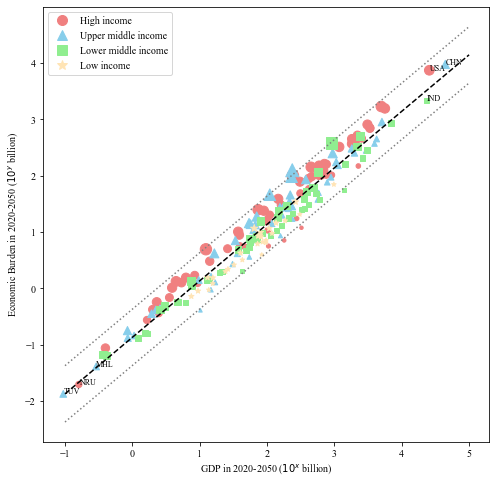

In [89]:

# plt.rcParams['font.family']='Courier New, monospace'
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(8,8))

colors = {'High income': 'lightcoral', 'Upper middle income' : 'skyblue', 'Lower middle income': 'lightgreen', 
       'Low income': 'moccasin'}
markers = {'High income': 'o', 'Upper middle income' : '^', 'Lower middle income': 's', 
       'Low income': '*'}
income_group = ['High income', 'Upper middle income', 'Lower middle income',  'Low income']

legends = []
for income in income_group:
    legend = mlines.Line2D([], [], color=colors[income], marker=markers[income], linestyle='None',
                          markersize=10, label=income)
    legends.append(legend)
plt.legend(handles=legends)
      

for income in income_group:
    area = data[data['Income group'] == income]
    x = area[['averageGDP']].apply(np.log10)
    y = area[['GDPloss']].apply(np.log10)
    ax.scatter(x, y, c = colors[income], marker = markers[income], s = 100 * 100 * area['tax'])

countries = ['CHN', 'USA', 'IND', 'TUV', 'NRU', 'MHL']
# countries = data['Country Code']
for country in countries:
    i = data[data['Country Code'] == country].index.values[0]
    x_i, y_i = np.log10(data.loc[i, 'averageGDP']), np.log10(data.loc[i, 'GDPloss'])
    ax.annotate(country, (x_i, y_i), size=8)
# i = data[data['Country Code'] == 'GEO'].index.values[0]    
# x_i, y_i = data.loc[i, 'averageGDP'] - 500, 100 * data.loc[i, 'GDPloss']
# ax.annotate('GEO', (x_i, y_i), size=8)
# i = data[data['Country Code'] == 'UKR'].index.values[0]    
# x_i, y_i = data.loc[i, 'averageGDP'] + 200, 100 * data.loc[i, 'GDPloss']
# ax.annotate('UKR', (x_i, y_i), size=8)
# i = data[data['Country Code'] == 'SVK'].index.values[0]    
# x_i, y_i = data.loc[i, 'averageGDP'], 100 * data.loc[i, 'GDPloss'] - 0.06
# ax.annotate('SVK', (x_i, y_i), size=8)

x1, x2 = -1, 5
plt.plot([x1, x2], [ols_results.params[0]+x1 * ols_results.params[1], ols_results.params[0]+x2 * ols_results.params[1]], linestyle='--', color='black')
plt.plot([x1, x2], [0.5 + ols_results.params[0]+x1 * ols_results.params[1], 0.5 + ols_results.params[0]+x2 * ols_results.params[1]], linestyle=':', color='grey')
plt.plot([x1, x2], [-0.5 + ols_results.params[0]+x1 * ols_results.params[1], -0.5 + ols_results.params[0]+x2 * ols_results.params[1]], linestyle=':', color='grey')

plt.ylabel('Economic Burden in 2020-2050 ($10^y$ billion)')
plt.xlabel('GDP in 2020-2050 ($10^x$ billion)')
plt.savefig('tables/figure_7.pdf')

## Population

In [90]:
# TOTAL_POP = pd.read_csv('data/POP_TOTAL.csv')
# TOTAL_POP['averagePOP'] = TOTAL_POP['totalPOP'] / 1000000 / (2051 - 2020)

In [91]:
# data = df_tax.merge(TOTAL_POP, on='Country Code')
# income = countries_info[['Country Code', 'Income group']]
# data = data.merge(income, on='Country Code')
# x = data[['averagePOP']].apply(np.log10)
# X = sm.add_constant(x)
# y = data[['GDPloss']].apply(np.log10)
# # y = data[['tax']]
# ols_model = sm.OLS(y, X)
# ols_results = ols_model.fit()
# print("Parameters: ", ols_results.params)
# print("R2: ", ols_results.rsquared)

In [92]:
# plt.rcParams['font.family']='Courier New, monospace'
# fig, ax = plt.subplots(figsize=(8,8))

# colors = {'High income': 'lightcoral', 'Upper middle income' : 'skyblue', 'Lower middle income': 'lightgreen', 
#        'Low income': 'moccasin'}
# markers = {'High income': 'o', 'Upper middle income' : '^', 'Lower middle income': 's', 
#        'Low income': '*'}
# income_group = ['High income', 'Upper middle income', 'Lower middle income',  'Low income']

# legends = []
# for income in income_group:
#     legend = mlines.Line2D([], [], color=colors[income], marker=markers[income], linestyle='None',
#                           markersize=10, label=income)
#     legends.append(legend)
# plt.legend(handles=legends)
      

# for income in income_group:
#     area = data[data['Income group'] == income]
#     x = area[['averagePOP']].apply(np.log10)
#     y = area[['GDPloss']].apply(np.log10)
#     ax.scatter(x, y, c = colors[income], marker = markers[income], s = 100 * 100 * area['tax'])

# countries = ['CHN', 'USA', 'IND', 'MCO']
# # countries = data['Country Code']
# for country in countries:
#     i = data[data['Country Code'] == country].index.values[0]
#     x_i, y_i = np.log10(data.loc[i, 'averagePOP']), np.log10(data.loc[i, 'GDPloss'])
#     ax.annotate(country, (x_i, y_i), size=8)

# plt.ylabel('Economic Burden in 2020-2050 ($10^y$ billion)')
# plt.xlabel('Average Population in 2020-2050 ($10^x$ million)')
# plt.savefig('tables/figure_8.pdf')

In [93]:
TOTAL_GDP = pd.read_csv('data/GDP_TOTAL.csv')
TOTAL_GDP['averageGDP'] = TOTAL_GDP['totalGDP'] / 1000000000 / (2051 - 2020)
TOTAL_POP = pd.read_csv('data/POP_TOTAL.csv')
TOTAL_POP['averagePOP'] = TOTAL_POP['totalPOP'] / 1000000 / (2051 - 2020)
TOTAL_DATA = TOTAL_GDP.merge(TOTAL_POP, on=['Country Code'])
TOTAL_DATA['pc_GDP'] = TOTAL_DATA['averageGDP'] / TOTAL_DATA['averagePOP']

## Per Capita Loss

In [94]:
data = df_tax.merge(TOTAL_DATA, on='Country Code')
income = countries_info[['Country Code', 'Income group']]
data = data.merge(income, on='Country Code')
x = data[['pc_GDP']].apply(np.log10)
X = sm.add_constant(x)
y = data[['pc_loss']].apply(np.log10)
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print("Parameters: ", ols_results.params)
print("R2: ", ols_results.rsquared)

Parameters:  const     1.867105
pc_GDP    1.227224
dtype: float64
R2:  0.923198445337683


/Users/caozhong/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


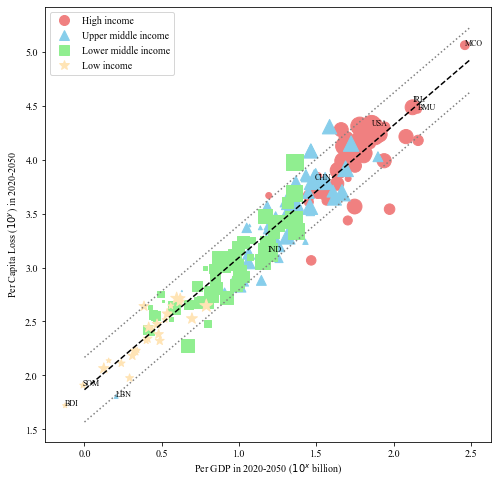

In [95]:

# plt.rcParams['font.family']='Courier New, monospace'
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(8,8))

colors = {'High income': 'lightcoral', 'Upper middle income' : 'skyblue', 'Lower middle income': 'lightgreen', 
       'Low income': 'moccasin'}
markers = {'High income': 'o', 'Upper middle income' : '^', 'Lower middle income': 's', 
       'Low income': '*'}
income_group = ['High income', 'Upper middle income', 'Lower middle income',  'Low income']

legends = []
for income in income_group:
    legend = mlines.Line2D([], [], color=colors[income], marker=markers[income], linestyle='None',
                          markersize=10, label=income)
    legends.append(legend)
plt.legend(handles=legends)
      

for income in income_group:
    area = data[data['Income group'] == income]
    x = area[['pc_GDP']].apply(np.log10)
    y = area[['pc_loss']].apply(np.log10)
    ax.scatter(x, y, c = colors[income], marker = markers[income], s = 30 * (area['GDPloss'] + 1).apply(np.log2))


# countries = ['MCO', 'BMU', 'CHN', 'USA', 'IND']
countries = ['MCO', 'BMU', 'BDI', 'SOM', 'LBN', 'USA', 'CHN', 'IND']
# countries = data['Country Code']
for country in countries:
    i = data[data['Country Code'] == country].index.values[0]
    x_i, y_i = np.log10(data.loc[i, 'pc_GDP']), np.log10(data.loc[i, 'pc_loss'])
    ax.annotate(country, (x_i, y_i), size=8)

i = data[data['Country Code'] == 'IRL'].index.values[0]    
x_i, y_i = np.log10(data.loc[i, 'pc_GDP']), 0.05 + np.log10(data.loc[i, 'pc_loss'])
ax.annotate('IRL', (x_i, y_i), size=8)


x1, x2 = 0, 2.5
plt.plot([x1, x2], [ols_results.params[0]+x1 * ols_results.params[1], ols_results.params[0]+x2 * ols_results.params[1]], linestyle='--', color='black')
plt.plot([x1, x2], [0.3 + ols_results.params[0]+x1 * ols_results.params[1], 0.3 + ols_results.params[0]+x2 * ols_results.params[1]], linestyle=':', color='grey')
plt.plot([x1, x2], [-0.3 + ols_results.params[0]+x1 * ols_results.params[1], -0.3 + ols_results.params[0]+x2 * ols_results.params[1]], linestyle=':', color='grey')

plt.ylabel('Per capita Loss ($10^y$) in 2020-2050')
plt.xlabel('Per GDP in 2020-2050 ($10^x$ billion)')
plt.savefig('tables/figure_6.pdf')

## Per Capita for DALYs

In [96]:
# ## DALYs
# DALYs = pd.read_csv('bigdata/Total cancers/DALYs (Disability-Adjusted Life Years).csv')

In [97]:
# data = df_tax.merge(DALYs, on='Country Code')
# income = countries_info[['Country Code', 'Income group']]
# data = data.merge(income, on='Country Code')
# x = data[['DALYs (Disability-Adjusted Life Years)']].apply(np.log10)
# X = sm.add_constant(x)
# y = data[['pc_loss']].apply(np.log10)
# ols_model = sm.OLS(y, X)
# ols_results = ols_model.fit()
# print("Parameters: ", ols_results.params)
# print("R2: ", ols_results.rsquared)

In [98]:

# plt.rcParams['font.family']='Courier New, monospace'
# fig, ax = plt.subplots(figsize=(8,8))

# colors = {'High income': 'lightcoral', 'Upper middle income' : 'skyblue', 'Lower middle income': 'lightgreen', 
#        'Low income': 'moccasin'}
# markers = {'High income': 'o', 'Upper middle income' : '^', 'Lower middle income': 's', 
#        'Low income': '*'}
# income_group = ['High income', 'Upper middle income', 'Lower middle income',  'Low income']

# legends = []
# for income in income_group:
#     legend = mlines.Line2D([], [], color=colors[income], marker=markers[income], linestyle='None',
#                           markersize=10, label=income)
#     legends.append(legend)
# plt.legend(handles=legends)
      

# for income in income_group:
#     area = data[data['Income group'] == income]
#     x = area[['DALYs (Disability-Adjusted Life Years)']].apply(np.log10)
#     y = area[['pc_loss']].apply(np.log10)
#     ax.scatter(x, y, c = colors[income], marker = markers[income], s = 30 * (area['GDPloss'] + 1).apply(np.log2))


# countries = ['MCO', 'IRL', 'BMU', 'BDI', 'SOM', 'LBN', 'USA', 'CHN', 'IND']
# # countries = data['Country Code']
# for country in countries:
#     i = data[data['Country Code'] == country].index.values[0]
#     x_i, y_i = np.log10(data.loc[i, 'DALYs (Disability-Adjusted Life Years)']), np.log10(data.loc[i, 'pc_loss'])
#     ax.annotate(country, (x_i, y_i), size=8)

# # x1, x2 = 3.0, 4.0
# # plt.plot([x1, x2], [ols_results.params[0]+x1 * ols_results.params[1], ols_results.params[0]+x2 * ols_results.params[1]], linestyle='--', color='black')
# # plt.plot([x1, x2], [0.3 + ols_results.params[0]+x1 * ols_results.params[1], 0.3 + ols_results.params[0]+x2 * ols_results.params[1]], linestyle=':', color='grey')
# # plt.plot([x1, x2], [-0.3 + ols_results.params[0]+x1 * ols_results.params[1], -0.3 + ols_results.params[0]+x2 * ols_results.params[1]], linestyle=':', color='grey')
# plt.xlim((2.9, 4.2))
# plt.ylim(1.5, 5.5)
# plt.ylabel('Per Capita Loss in 2020-2050')
# plt.xlabel('DALYs in 2019 (per 100,000)')
# plt.savefig('tables/figure_10.pdf')

## All plots for supplementary

In [99]:
TOTAL_GDP = pd.read_csv('data/GDP_TOTAL.csv')
TOTAL_GDP['averageGDP'] = TOTAL_GDP['totalGDP'] / 1000000000 / (2051 - 2020)
TOTAL_POP = pd.read_csv('data/POP_TOTAL.csv')
TOTAL_POP['averagePOP'] = TOTAL_POP['totalPOP'] / 1000000 / (2051 - 2020)
TOTAL_DATA = TOTAL_GDP.merge(TOTAL_POP, on=['Country Code'])
TOTAL_DATA['pc_GDP'] = TOTAL_DATA['averageGDP'] / TOTAL_DATA['averagePOP']
DALYs = pd.read_csv('bigdata/Total cancers/DALYs (Disability-Adjusted Life Years).csv')
TOTAL_DATA = TOTAL_DATA.merge(DALYs, on=['Country Code'])
savings = pd.read_csv('data/savings.csv')[['Country Code', '2019']]
savings = savings.rename(columns={'2019':'savings'})
TOTAL_DATA = TOTAL_DATA.merge(savings, on=['Country Code'])
physical = pd.read_csv('data/physical.csv')[['Country Code', '2019']]
physical = physical.rename(columns={'2019':'physical'})
TOTAL_DATA = TOTAL_DATA.merge(physical, on=['Country Code'])
he = pd.read_csv('data/hepc_ppp.csv')[['Country Code', '2019']]
he = he.rename(columns={'2019':'he'})
TOTAL_DATA = TOTAL_DATA.merge(he, on=['Country Code'])

In [100]:
TOTAL_DATA['savings']

0      25.524848
1      15.796363
2      10.241489
3      22.466030
4      28.474219
         ...    
139    39.672909
140    23.102118
141    14.946976
142    39.731498
143    13.477092
Name: savings, Length: 144, dtype: float64

/Users/caozhong/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Parameters:  const                                    -5.283945
DALYs (Disability-Adjusted Life Years)    0.843443
dtype: float64
R2:  0.7217791232922985
Parameters:  const    -2.683137
pc_GDP    0.259438
dtype: float64
R2:  0.2833456347863086
Parameters:  const        -2.475456
averageGDP    0.049207
dtype: float64
R2:  0.02855367292141331
Parameters:  const        -2.301757
averagePOP   -0.052027
dtype: float64
R2:  0.026631247546661463
Parameters:  const                                    -4.073093
DALYs (Disability-Adjusted Life Years)    2.149866
dtype: float64
R2:  0.6369387991395186
Parameters:  const     1.813094
pc_GDP    1.256899
dtype: float64
R2:  0.9032978616927937
Parameters:  const         2.650482
averageGDP    0.309997
dtype: float64
R2:  0.15392189443728377
Parameters:  const         3.565554
averagePOP   -0.166232
dtype: float64
R2:  0.036927608051222194
Parameters:  const                                    -4.123303
DALYs (Disability-Adjusted Life Years)    1.618595

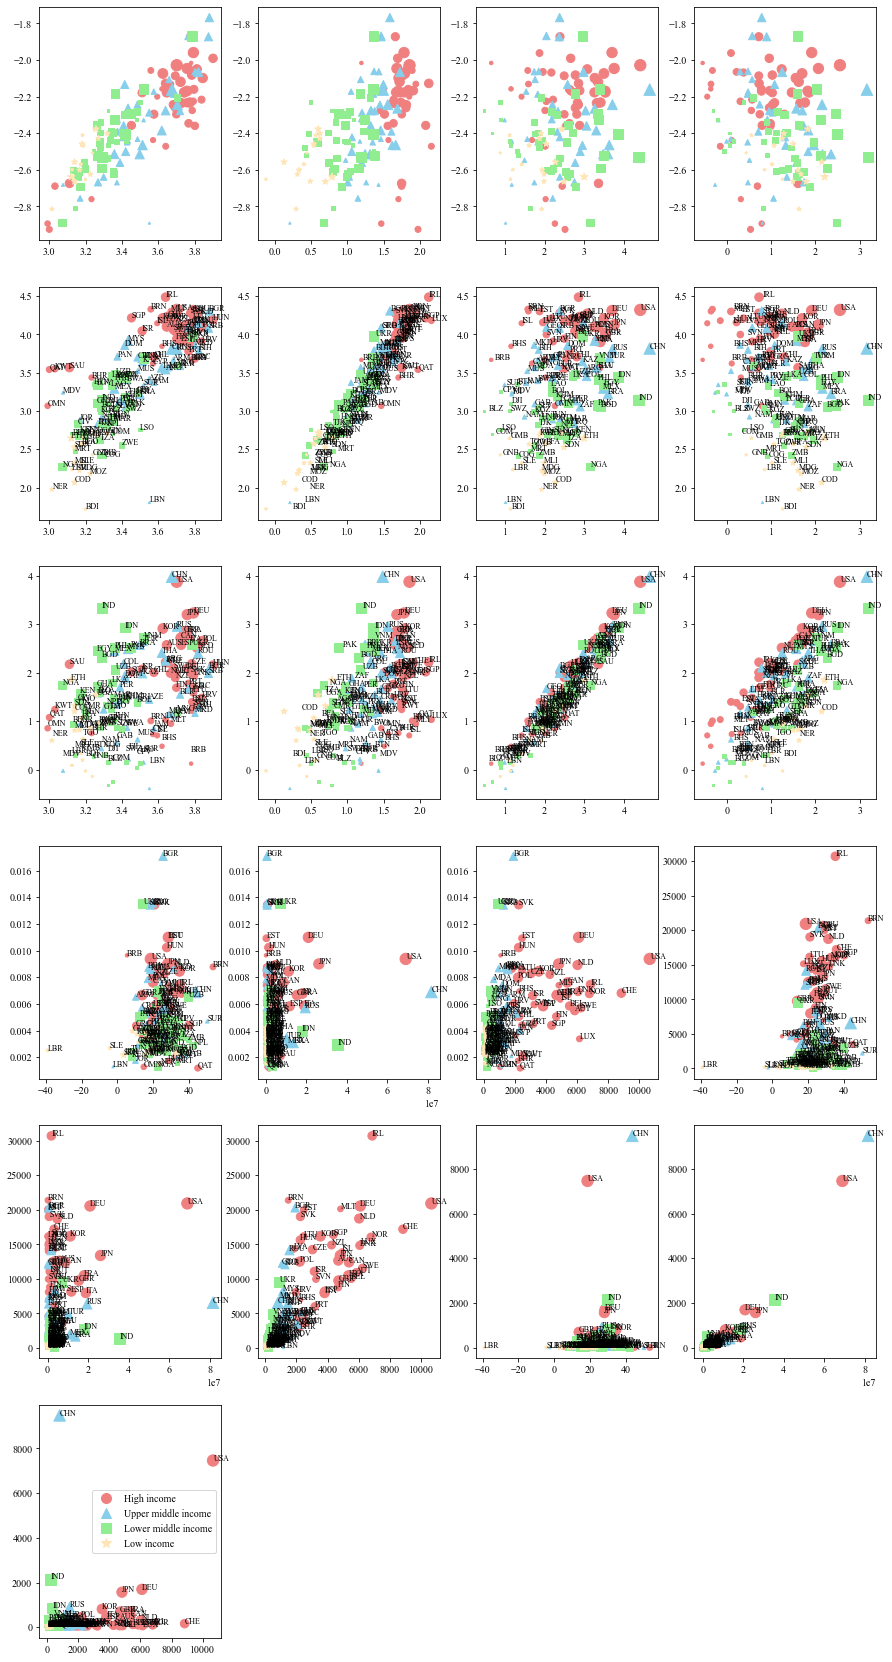

In [101]:
data = df_tax.merge(TOTAL_DATA, on='Country Code')
income = countries_info[['Country Code', 'Income group']]
data = data.merge(income, on='Country Code')

# plt.rcParams['font.family']='Courier New, monospace'
plt.rcParams["font.family"] = "Times New Roman"


colors = {'High income': 'lightcoral', 'Upper middle income' : 'skyblue', 'Lower middle income': 'lightgreen', 
    'Low income': 'moccasin'}
markers = {'High income': 'o', 'Upper middle income' : '^', 'Lower middle income': 's', 
    'Low income': '*'}
income_group = ['High income', 'Upper middle income', 'Lower middle income',  'Low income']
legends = []
for income in income_group:
    legend = mlines.Line2D([], [], color=colors[income], marker=markers[income], linestyle='None',
                        markersize=10, label=income)
    legends.append(legend)
fig = plt.figure(figsize=(15,30))
# 

count = 1
for y_ident in ['tax', 'pc_loss', 'GDPloss']:
    for x_ident in ['DALYs (Disability-Adjusted Life Years)', 'pc_GDP', 'averageGDP', 'averagePOP']:
        x = data[[x_ident]].apply(np.log10)
        X = sm.add_constant(x)
        y = data[[y_ident]].apply(np.log10)
        ols_model = sm.OLS(y, X)
        ols_results = ols_model.fit()
        print("Parameters: ", ols_results.params)
        print("R2: ", ols_results.rsquared)

        ax = fig.add_subplot(6, 4, count)
        count += 1

        for income in income_group:
            area = data[data['Income group'] == income]
            x = area[[x_ident]].apply(np.log10)
            y = area[[y_ident]].apply(np.log10)
            ax.scatter(x, y, c = colors[income], marker = markers[income], s = 10 * (area['GDPloss'] + 1).apply(np.log2))

        # countries = ['MCO', 'IRL', 'BMU', 'BDI', 'SOM', 'LBN', 'USA', 'CHN', 'IND']
        countries = data['Country Code']
        for country in countries:
            i = data[data['Country Code'] == country].index.values[0]
            x_i, y_i = np.log10(data.loc[i, x_ident] + 1), np.log10(data.loc[i, y_ident] + 1)
            ax.annotate(country, (x_i, y_i), size=8)

for y_ident in ['tax', 'pc_loss', 'GDPloss']:
    for x_ident in ['savings', 'physical', 'he']:
        x = data[[x_ident]]
        X = sm.add_constant(x)
        y = data[[y_ident]]
        ols_model = sm.OLS(y, X)
        ols_results = ols_model.fit()
        print("Parameters: ", ols_results.params)
        print("R2: ", ols_results.rsquared)

        ax = fig.add_subplot(6, 4, count)
        count += 1

        for income in income_group:
            area = data[data['Income group'] == income]
            x = area[[x_ident]]
            y = area[[y_ident]]
            ax.scatter(x, y, c = colors[income], marker = markers[income], s = 10 * (area['GDPloss'] + 1).apply(np.log2))

        # countries = ['MCO', 'IRL', 'BMU', 'BDI', 'SOM', 'LBN', 'USA', 'CHN', 'IND']
        countries = data['Country Code']
        for country in countries:
            i = data[data['Country Code'] == country].index.values[0]
            x_i, y_i = data.loc[i, x_ident], data.loc[i, y_ident]
            ax.annotate(country, (x_i, y_i), size=8)

plt.legend(handles=legends)
plt.savefig('tables/figure_S6.pdf') 